# Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from pathlib import Path
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tyesondemets/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles. Using get_top_headlines did not yield sufficient results
btc_news = newsapi.get_everything(
    q='bitcoin' or 'btc',
    language='en',
    page_size=100,
    sort_by='relevancy'
)

In [5]:
#Display articles
btc_news

{'status': 'ok',
 'totalResults': 8262,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Jeff Somers',
   'title': 'Is the Crypto Bubble Going to Burst?',
   'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
   'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
   'publishedAt': '2022-02-09T16:00:00Z',
   'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'},
  {'sou

In [6]:
# Fetch the Ethereum news articles. Using get_top_headlines did not yield sufficient results.
eth_news = newsapi.get_everything(
    q='ethereum' or 'eth',
    language='en',
    page_size=100,
    sort_by='relevancy'
)

In [7]:
#Display articles
eth_news

{'status': 'ok',
 'totalResults': 3898,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Corin Faife',
   'title': 'Crypto.com admits over $30 million stolen by hackers',
   'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
   'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
   'publishedAt': '2022-01-20T13:23:31Z',
   'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author

In [8]:
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [9]:
#Create DataFrame for both cryptocurrencies
btc_df = create_df(btc_news['articles'])
eth_df = create_df(eth_news['articles'])

In [10]:
#Display Bitcoin DataFrame
btc_df.head()

,title,description,text,date
0,Is the Crypto Bubble Going to Burst?,Even if you aren’t paying attention to Bitcoin...,Even if you arent paying attention to Bitcoin ...,2022-02-09T16:00:00Z
1,"As Kazakhstan Descends into Chaos, Crypto Mine...",The central Asian country became No. 2 in the ...,When Denis Rusinovich set up cryptocurrency mi...,2022-01-12T12:00:00Z
2,The International Monetary Fund tells El Salva...,The International Monetary Fund’s executive di...,El Salvador introduced Bitcoin as a legal tend...,2022-01-25T22:11:14Z
3,Jack Dorsey’s Block is working to make Bitcoin...,Block is working on building an “open Bitcoin ...,Were officially building an open Bitcoin minin...,2022-01-14T13:46:28Z
4,DeepDotWeb operator sentenced to eight years f...,"The operator of DeepDotWeb, a site that indexe...",Israeli national Tal Prihar pled guilty to rou...,2022-01-27T18:16:57Z


In [11]:
#Display Ethereum DataFrame
eth_df.head()

,title,description,text,date
0,Crypto.com admits over $30 million stolen by h...,Cryptocurrency exchange Crypto.com has said th...,"In a new blog post the company said that 4,836...",2022-01-20T13:23:31Z
1,Hackers Launder $15 Million Stolen From Crypto...,Hackers who made off with roughly $15 million ...,Hackers who made off with roughly $15 million ...,2022-01-19T12:00:00Z
2,Eric Adams Is Taking His First Paycheck in Crypto,"Mr. Adams, who wants New York City to become t...","On some level, the new mayor is simply employi...",2022-01-20T19:54:48Z
3,Robinhood opens cryptocurrency wallet to beta ...,"Back in September\r\n, Robinhood announced pla...","Back in September\r\n, Robinhood announced pla...",2022-01-21T22:57:21Z
4,Public Blockchains Are the New National Econom...,The “fiscal” and “monetary” policy tools of sm...,This enables an L1 platform to bootstrap its n...,2022-02-09T12:00:00Z


In [15]:
# Create the Bitcoin sentiment scores DataFrame using newsapi description as supplement for headlines.
btc_sentiments = []

for article in btc_news['articles']:
    try:
        text = article["description"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
# Create DataFrame
btc_sentiments_df = pd.DataFrame(btc_sentiments)

#Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiments_df = btc_sentiments_df[cols]

btc_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-09T16:00:00Z,Even if you aren’t paying attention to Bitcoin...,0.5994,0.126,0.000,0.874
1,2022-01-12T12:00:00Z,The central Asian country became No. 2 in the ...,-0.8047,0.000,0.296,0.704
2,2022-01-25T22:11:14Z,The International Monetary Fund’s executive di...,0.0258,0.088,0.059,0.853
3,2022-01-14T13:46:28Z,Block is working on building an “open Bitcoin ...,0.3182,0.133,0.074,0.793
4,2022-01-27T18:16:57Z,"The operator of DeepDotWeb, a site that indexe...",-0.4404,0.000,0.135,0.865


In [16]:
# Create the Ethereum sentiment scores DataFrame using newsapi description as supplement for headlines.
eth_sentiments = []

for article in eth_news['articles']:
    try:
        text = article["description"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
# Create DataFrame
eth_sentiments_df = pd.DataFrame(eth_sentiments)

#Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiments_df = eth_sentiments_df[cols]

eth_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2022-01-20T13:23:31Z,Cryptocurrency exchange Crypto.com has said th...,-0.2023,0.094,0.125,0.781
1,2022-01-19T12:00:00Z,Hackers who made off with roughly $15 million ...,0.3400,0.059,0.000,0.941
2,2022-01-20T19:54:48Z,"Mr. Adams, who wants New York City to become t...",0.0000,0.000,0.000,1.000
3,2022-01-21T22:57:21Z,"Back in September\r\n, Robinhood announced pla...",0.0772,0.031,0.000,0.969
4,2022-02-09T12:00:00Z,The “fiscal” and “monetary” policy tools of sm...,0.6808,0.219,0.000,0.781


In [17]:
# Describe the Bitcoin Sentiment
btc_sentiments_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,-0.038433,0.076000,0.081720,0.842290
std,0.480083,0.082331,0.090378,0.109893
min,-0.822500,0.000000,0.000000,0.571000
25%,-0.440400,0.000000,0.000000,0.780000
50%,0.000000,0.063500,0.064000,0.854000
75%,0.361200,0.117500,0.143500,0.922250
max,0.921700,0.347000,0.398000,1.000000


In [18]:
# Describe the Ethereum Sentiment
eth_sentiments_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.133825,0.089920,0.047220,0.862830
std,0.437729,0.097545,0.069926,0.118092
min,-0.735100,0.000000,0.000000,0.455000
25%,-0.109025,0.000000,0.000000,0.784500
50%,0.000000,0.066000,0.000000,0.886000
75%,0.481000,0.132250,0.089500,0.960750
max,0.921700,0.347000,0.295000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Both Bitcoin and Ethereum have the same max compound score

Q. Which coin had the highest positive score?

A: Both Bitcoin and Ethereum have the same max positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [177]:
def tokenizer (article):
    # Define a set of stopwords using `stopwords.words()`
    sw = set(stopwords.words('english'))
    #Create custom stopwords
    sw_addons = {
        'said', 
        'today', 
        'week',
        'Sunday',
        'sunday',
        'Monday',
        'monday,'
        'Tuesday',
        'tuesday',
        'Wednesday',
        'wednesday',
        'Thursday',
        'thursday',
        'Friday',
        'friday',
        'Saturday',
        'saturday',
        'November',
        'november',
        'month',
        'morning',
        'first',
        'last',
        'last year',
        'year', 
        'new',
        'according',
        'us',
        'next',
        'say',
        'even',
        'one',
        'arent'
        }
    # Define the regex parameters
    regex = re.compile("[^a-zA-Z ]")
    # Apply regex parameters to article
    re_clean = regex.sub('', article)
    # Apply `word_tokenize` to the regex scrubbed text
    re_words = word_tokenize(re_clean)
    #Apply lemmatizer
    lem = [lemmatizer.lemmatize(word) for word in re_words]
    # Create list of lower-case words that are not in the stopword set
    tokens = [word.lower() for word in re_words if word.lower() not in sw.union(sw_addons)]
    # Return the final list
    return tokens

In [178]:
#' '.join(btc_sentiments_df['text'])

In [179]:
#btc_string = btc_sentiments_df['text'].to_string()



In [180]:
# Create a new tokens column for Bitcoin
btc_big_string = ' '.join(btc_sentiments_df['text'].tolist())
btc_tokens = pd.DataFrame(tokenizer(btc_big_string))
btc_tokens.columns = ['BTC_Tokens']
btc_tokens

,BTC_Tokens
0,paying
1,attention
2,bitcoin
3,cryptocurrencies
4,might
...,...
1745,fund
1746,imf
1747,called
1748,el


In [181]:
file_path = Path('Resources/btc_tokens.csv')
btc_tokens.to_csv(file_path, index=False)

In [182]:
# Create a new tokens column for Ethereum
eth_big_string = ' '.join(eth_sentiments_df['text'].tolist())
eth_tokens = pd.DataFrame(tokenizer(eth_big_string))
eth_tokens.columns = ['ETH_Tokens']
eth_tokens

,ETH_Tokens
0,cryptocurrency
1,exchange
2,cryptocom
3,million
4,ethereum
...,...
1769,mdash
1770,highest
1771,level
1772,since


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [183]:
from collections import Counter
from nltk import ngrams

In [184]:
# Generate the Bitcoin N-grams where N=2
btc_tokenized = tokenizer(btc_big_string)
btc_bigrams = Counter(ngrams(btc_tokenized, n=2))
print(dict(btc_bigrams))

{('paying', 'attention'): 1, ('attention', 'bitcoin'): 1, ('bitcoin', 'cryptocurrencies'): 1, ('cryptocurrencies', 'might'): 1, ('might', 'noticed'): 1, ('noticed', 'value'): 1, ('value', 'plummeted'): 1, ('plummeted', 'total'): 1, ('total', 'value'): 1, ('value', 'market'): 1, ('market', 'tumbling'): 1, ('tumbling', 'high'): 1, ('high', 'trillion'): 1, ('trillion', 'trillion'): 1, ('trillion', 'matter'): 1, ('matter', 'days'): 1, ('days', 'central'): 1, ('central', 'asian'): 1, ('asian', 'country'): 1, ('country', 'became'): 1, ('became', 'world'): 1, ('world', 'bitcoin'): 1, ('bitcoin', 'mining'): 6, ('mining', 'political'): 1, ('political', 'turmoil'): 1, ('turmoil', 'power'): 1, ('power', 'cuts'): 1, ('cuts', 'hit'): 1, ('hit', 'hard'): 1, ('hard', 'future'): 1, ('future', 'looks'): 1, ('looks', 'bleak'): 1, ('bleak', 'international'): 1, ('international', 'monetary'): 6, ('monetary', 'funds'): 2, ('funds', 'executive'): 1, ('executive', 'directors'): 1, ('directors', 'recommended'

In [185]:
# Generate the Ethereum N-grams where N=2
eth_tokenized = tokenizer(eth_big_string)
eth_bigrams = Counter(ngrams(eth_tokenized, n=2))
print(dict(eth_bigrams))

{('cryptocurrency', 'exchange'): 2, ('exchange', 'cryptocom'): 1, ('cryptocom', 'million'): 1, ('million', 'ethereum'): 3, ('ethereum', 'million'): 1, ('million', 'bitcoin'): 1, ('bitcoin', 'stolen'): 1, ('stolen', 'hackers'): 1, ('hackers', 'security'): 1, ('security', 'breach'): 1, ('breach', 'hackers'): 1, ('hackers', 'made'): 1, ('made', 'roughly'): 1, ('roughly', 'million'): 1, ('ethereum', 'cryptocom'): 1, ('cryptocom', 'attempting'): 1, ('attempting', 'launder'): 1, ('launder', 'funds'): 1, ('funds', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'mixer'): 1, ('mixer', 'known'): 1, ('known', 'tornado'): 1, ('tornado', 'cash'): 1, ('cash', 'report'): 1, ('report', 'crypto'): 1, ('crypto', 'security'): 1, ('security', 'company'): 1, ('company', 'peck'): 1, ('peck', 'shield'): 1, ('shield', 'mixers'): 1, ('mixers', 'run'): 1, ('run', 'interfere'): 1, ('interfere', 'mr'): 1, ('mr', 'adams'): 1, ('adams', 'wants'): 1, ('wants', 'york'): 1, ('york', 'city'): 4, ('city', 'be

In [186]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [187]:
# Use token_count to get the top 10 words for Bitcoin
print(token_count(btc_tokenized))

[('bitcoin', 67), ('cryptocurrency', 38), ('crypto', 17), ('mining', 10), ('digital', 10), ('cryptocurrencies', 9), ('million', 9), ('trading', 9), ('monday', 9), ('price', 9)]


In [188]:
# Use token_count to get the top 10 words for Ethereum
print(token_count(eth_tokenized))

[('ethereum', 35), ('cryptocurrency', 26), ('crypto', 23), ('bitcoin', 20), ('million', 16), ('blockchain', 14), ('nft', 13), ('market', 13), ('trading', 11), ('nfts', 9)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [189]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

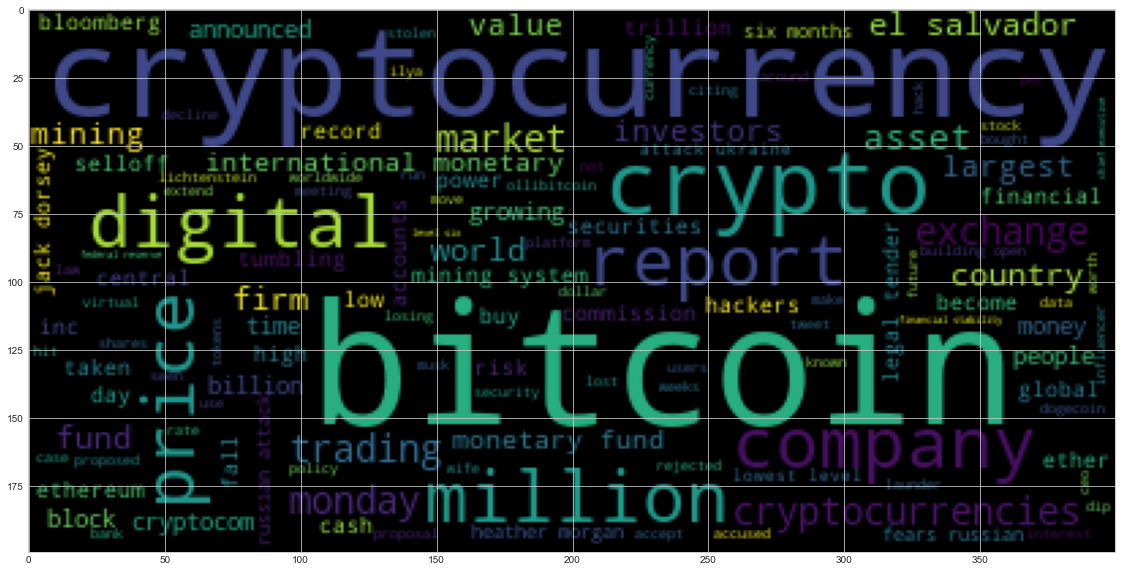

In [190]:
# Generate the Bitcoin word cloud
btc_tokenized_string = ' '.join(map(str,btc_tokenized))
btc_wc = WordCloud().generate(btc_tokenized_string)
plt.imshow(btc_wc)

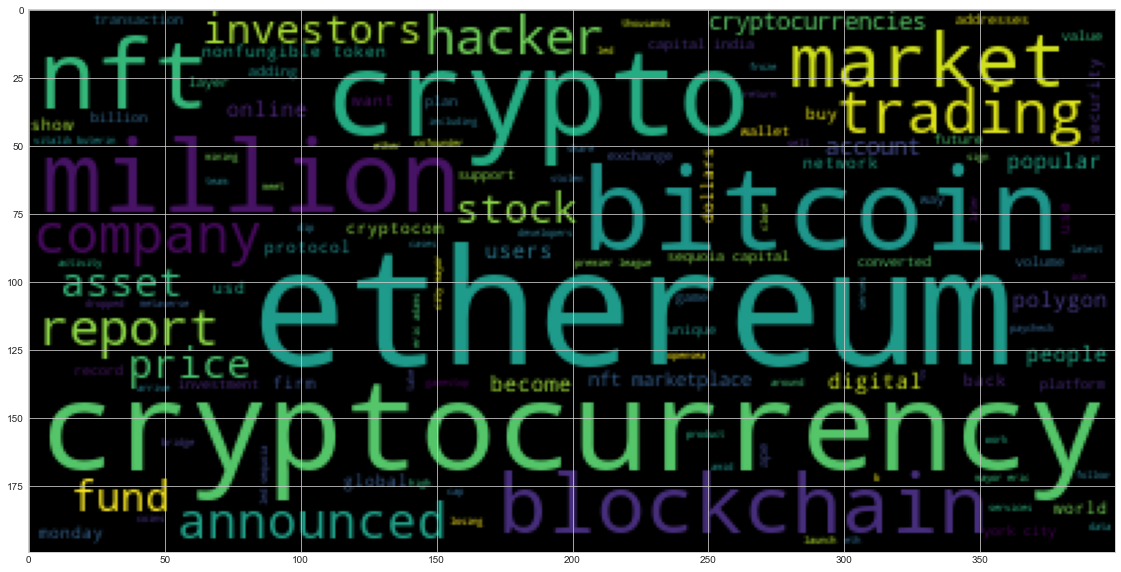

In [191]:
# Generate the Ethereum word cloud
eth_tokenized_string = ' '.join(map(str,eth_tokenized))
eth_wc = WordCloud().generate(eth_tokenized_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [192]:
import spacy
from spacy import displacy

In [193]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_lg

In [194]:
# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

---
### Bitcoin NER

In [195]:
# Concatenate all of the Bitcoin text together
btc_big_string

'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days… The central Asian country became No. 2 in the world for Bitcoin mining. But political turmoil and power cuts have hit hard, and the future looks bleak. The International Monetary Fund’s executive directors have recommended to El Salvador that it should narrow the scope of its Bitcoin law, making it so that the cryptocurrency is no longer legal tender in the country. Block is working on building an “open Bitcoin mining system,” its CEO Jack Dorsey has announced. The company’s goals for the system are for it to be easily available, reliable, and relatively power efficient. The operator of DeepDotWeb, a site that indexed dark net marketplaces accessible through Tor browser, was sentenced to eight years after pleading guilty to mone

In [196]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_big_string)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER'

In [197]:
# Render the visualization
btc_ner = displacy.render(btc_doc, style='ent')
btc_ner

In [198]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

last week DATE
$3 trillion MONEY
last year DATE
about $1.5 trillion MONEY
days DATE
Asian NORP
2 CARDINAL
The International Monetary Fund’s ORG
El Salvador GPE
Jack Dorsey PERSON
DeepDotWeb ORG
Tor ORG
eight years DATE
Bitcoin ORG
Crypto.com ORG
$15 million MONEY
$18 million MONEY
Bitcoin ORG
Saturday DATE
more than 50% PERCENT
November DATE
more than $600 billion MONEY
over $1 trillion MONEY
Jack Dorsey PERSON
Twitter ORG
Dorsey PERSON
October last year DATE
Square FAC
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File PERSON
Tesla Inc ORG
dogeco ORG
Adams PERSON
New York City GPE
Bitcoin and Ethereum ORG
November 28, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File PERSON
Russia GPE
Thursday DATE
mi GPE
2016 DATE
Hong Kong GPE
Bitfinex ORG
Changpeng PERSON
billionaire(Image ORG
Bloomberg ORG
Getty ORG
Changpeng PERSON
Zhao PERSON
The U.S. Securities and Exchange Commission ORG
Thursday DATE
ETF ORG
Fidelity's Wise Origin Bitcoin Trust ORG
Ilya Lichtenstein PERSON
Heath

---

### Ethereum NER

In [199]:
# Concatenate all of the Ethereum text together
eth_big_string

'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach Hackers who made off with roughly $15 million in ethereum from Crypto.com are attempting to launder the funds through a so-called ethereum “mixer,” known as Tornado Cash, according to a new report from crypto security company Peck Shield. Mixers run interfere… Mr. Adams, who wants New York City to become the global capital for cryptocurrency, will have his paycheck converted into Bitcoin and Ethereum. Back in September\r\n, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the beta to a small number of people before expanding availability ahead of a full-scale release. If you joined the wait… The “fiscal” and “monetary” policy tools of smart contract blockchain platforms\xa0may work even\xa0better than the economic policy tools of governments. Trading platform Crypto.com lost 

In [200]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_big_string)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

In [201]:
# Render the visualization
eth_ner = displacy.render(eth_doc, style='ent')
eth_ner

In [202]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Crypto.com ORG
$15 million MONEY
$18 million MONEY
roughly $15 million MONEY
Crypto.com ORG
Tornado Cash ORG
Peck Shield PERSON
Adams PERSON
New York City GPE
Bitcoin and Ethereum ORG
September DATE
Robinhood ORG
Crypto.com ORG
about $34 million MONEY
Monday DATE
overnight TIME
NFT ORG
OpenSea ORG
earlier this month DATE
Ethereum ORG
418% PERCENT
2021 DATE
AMC Entertainment ORG
AMC ORG
GameStop ORG
GME ORG
Ethereum PERSON
more than 650% PERCENT
Vitalik Buterin PERSON
Ethereum ORG
27-year-old DATE
Crypto.com ORG
Polygon ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
SoftBank ORG
Ethereum PERSON
blockchain bridge WORK_OF_ART
$10 million MONEY
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
imm ORG
8.82% PERCENT
40,611.4 MONEY
2202 CARDINAL
Friday DATE
3,291.29 MONEY
Vitalik Buterin PERSON
Ethereum ORG
New York City GPE
Eric Adams PERSON
first ORDINAL
Friday DATE
Bitcoin and Ethereum ORG
GameStop Corp ORG
Immutable X PRODUCT
later this year DATE
9.28% PERC

---